# 判断机器学习算法的性能
> **查看sclearn中数字辨别的数据库, 注意X 和 y 数据的调用方法**

> **调用plt中的Imshow方法显示图形**

<img src='./picture/4-1.png' style='width:500px;heigh:200px;float:left'>

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
digits = datasets.load_digits() ##传入手写数据

In [3]:
digits.keys() ##手写数据的内容

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [4]:
print(digits.DESCR) ##一共5620个样本，64个特征（8*8像素点的深浅，0-16程度），10个label

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

In [5]:
X = digits.data ##1797个样本，64个特征
X.shape

(1797, 64)

In [6]:
y = digits.target ##1797个样本-label向量
y.shape

(1797,)

In [7]:
digits.target_names ##label的值

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [8]:
y[:4]

array([0, 1, 2, 3])

In [9]:
X[:4]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
        14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
         1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
         0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  

In [10]:
some_digit = X[666]

In [11]:
y[666]

0

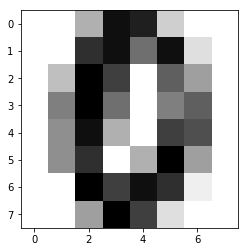

In [12]:
some_digit_image = some_digit.reshape(8,8) ##通过reshape方法转换成8x8的矩阵
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary) ##调用Imshow方法，显示图像
plt.show()

## 自行封装算法查看kNN算法准确度的流程
> **利用y_predict和y_test的结果比对，差看结果的准确度**

> **封装score函数，直接传入测试数据集（x_test,y_test）查看算法准确度**


In [13]:
import sys ##将包的路径导入
sys.path.append(r'../') 
from ml_python.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [14]:
from ml_python.kNN_new import KNNClassifier
my_knn_clf = KNNClassifier(k = 3)
my_knn_clf.fit(X_train, y_train)
y_predict = my_knn_clf.predict(X_test)

In [15]:
y_predict

array([8, 9, 4, 0, 6, 9, 2, 3, 3, 3, 4, 5, 7, 4, 8, 3, 9, 5, 7, 3, 1, 6,
       3, 4, 2, 7, 8, 4, 3, 7, 3, 7, 4, 7, 7, 5, 2, 1, 9, 8, 6, 3, 6, 6,
       6, 2, 6, 2, 5, 5, 1, 9, 5, 6, 8, 2, 8, 4, 6, 5, 3, 6, 6, 7, 7, 4,
       8, 3, 7, 7, 9, 1, 0, 9, 8, 5, 6, 6, 2, 1, 0, 5, 5, 2, 4, 2, 3, 5,
       4, 1, 4, 1, 6, 4, 3, 0, 3, 7, 6, 8, 9, 7, 7, 6, 7, 3, 8, 3, 0, 4,
       9, 0, 1, 0, 3, 0, 2, 3, 2, 7, 7, 5, 9, 2, 3, 3, 5, 5, 1, 4, 5, 2,
       1, 5, 4, 2, 4, 6, 3, 2, 4, 8, 2, 3, 3, 8, 2, 4, 1, 5, 4, 9, 1, 4,
       1, 7, 7, 3, 6, 4, 7, 2, 8, 2, 1, 9, 8, 7, 4, 3, 7, 3, 5, 3, 8, 8,
       9, 4, 2, 7, 2, 2, 2, 4, 8, 3, 2, 6, 9, 3, 4, 7, 9, 1, 9, 8, 2, 1,
       8, 3, 9, 4, 5, 4, 0, 5, 6, 6, 1, 0, 3, 4, 7, 8, 3, 6, 8, 7, 6, 7,
       1, 2, 7, 1, 1, 5, 0, 5, 6, 9, 6, 1, 7, 1, 8, 0, 6, 5, 2, 5, 8, 6,
       7, 3, 8, 8, 4, 7, 5, 8, 3, 6, 3, 7, 8, 6, 7, 0, 0, 4, 8, 0, 9, 2,
       4, 2, 4, 5, 3, 5, 0, 2, 8, 5, 2, 2, 6, 8, 8, 0, 9, 5, 9, 1, 6, 2,
       4, 9, 1, 3, 2, 7, 1, 9, 3, 5, 6, 6, 6, 8, 8,

In [16]:
y_test

array([8, 9, 4, 0, 6, 9, 2, 3, 3, 3, 4, 5, 7, 4, 8, 2, 9, 5, 7, 3, 1, 6,
       3, 4, 2, 7, 8, 4, 3, 7, 3, 7, 4, 7, 7, 5, 2, 1, 9, 8, 6, 3, 6, 6,
       6, 2, 6, 2, 5, 5, 1, 9, 5, 6, 8, 2, 8, 4, 6, 5, 3, 6, 6, 7, 7, 4,
       8, 9, 7, 7, 9, 1, 0, 9, 8, 5, 6, 6, 2, 1, 0, 5, 5, 2, 4, 2, 3, 5,
       4, 1, 4, 1, 6, 4, 3, 0, 3, 7, 6, 8, 9, 7, 7, 6, 7, 3, 8, 3, 0, 4,
       9, 0, 1, 0, 3, 0, 2, 3, 2, 7, 7, 5, 9, 2, 3, 3, 5, 5, 1, 4, 5, 2,
       1, 5, 4, 2, 4, 6, 3, 2, 4, 8, 2, 3, 3, 8, 2, 4, 1, 5, 4, 9, 1, 4,
       1, 7, 7, 3, 6, 4, 7, 2, 8, 2, 1, 9, 8, 7, 4, 3, 7, 3, 5, 3, 8, 8,
       9, 4, 2, 7, 2, 2, 2, 4, 8, 3, 2, 6, 9, 3, 4, 7, 9, 1, 9, 8, 2, 1,
       8, 3, 9, 4, 5, 4, 0, 5, 6, 6, 1, 0, 3, 4, 7, 8, 3, 6, 8, 7, 6, 7,
       1, 2, 7, 1, 1, 5, 0, 5, 6, 9, 6, 1, 7, 1, 8, 0, 6, 5, 2, 5, 8, 6,
       7, 3, 8, 8, 4, 7, 5, 8, 3, 6, 3, 7, 8, 6, 7, 0, 0, 4, 8, 0, 9, 2,
       4, 2, 4, 5, 3, 5, 0, 2, 8, 5, 2, 2, 6, 8, 8, 0, 9, 5, 9, 8, 6, 2,
       4, 9, 1, 3, 2, 7, 1, 9, 3, 5, 6, 6, 6, 8, 8,

In [17]:
sum(y_predict == y_test)/len(y_test)

0.9860724233983287

In [18]:
from ml_python.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.9860724233983287

In [19]:
my_knn_clf.score(X_test, y_test)

0.9860724233983287

## scikit-leatn中的accuracy_score

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=666)

In [22]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors = 3)

knn_clf.fit(X_train, y_train)

y_predict = knn_clf.predict(X_test)


In [23]:
from sklearn.metrics import accuracy_score

In [25]:
accuracy_score(y_test, y_predict)

0.9888888888888889

In [26]:
knn_clf.score(X_test, y_test)

0.9888888888888889